In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
import numpy as np

In [2]:
#data loading into working space
df = pd.read_csv("C:/Users/Admin/Desktop/diabetes_unclean.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [4]:
#showing the columns of the data set
df.columns


Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [5]:
df.rename(columns={'ID':'Patients ID','No_Pation':'Number of Patients','Gender':'Sex','AGE':'Patient Age '},inplace=True)
df.head()

,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [6]:
df.isnull().sum()

Patients ID           0
Number of Patients    0
Sex                   0
Patient Age           1
Urea                  1
Cr                    2
HbA1c                 3
Chol                  2
TG                    2
HDL                   1
LDL                   2
VLDL                  1
BMI                   0
CLASS                 0
dtype: int64

In [7]:
mean_value = df['HbA1c'].mean()
mean_value

8.284155069582505

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

Patients ID           0
Number of Patients    0
Sex                   0
Patient Age           0
Urea                  0
Cr                    0
HbA1c                 0
Chol                  0
TG                    0
HDL                   0
LDL                   0
VLDL                  0
BMI                   0
CLASS                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patients ID         994 non-null    int64  
 1   Number of Patients  994 non-null    int64  
 2   Sex                 994 non-null    object 
 3   Patient Age         994 non-null    float64
 4   Urea                994 non-null    float64
 5   Cr                  994 non-null    float64
 6   HbA1c               994 non-null    float64
 7   Chol                994 non-null    float64
 8   TG                  994 non-null    float64
 9   HDL                 994 non-null    float64
 10  LDL                 994 non-null    float64
 11  VLDL                994 non-null    float64
 12  BMI                 994 non-null    float64
 13  CLASS               994 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 116.5+ KB


In [10]:
df.groupby('CLASS')['CLASS'].agg('count')

CLASS
N     102
N       1
P      53
Y     830
Y       8
Name: CLASS, dtype: int64

In [11]:
duplicates = df[df.duplicated()]

df['CLASS'].unique()



array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [12]:
df['CLASS'] = df['CLASS'].str.replace('N ','N')
df['CLASS'] = df['CLASS'].str.replace('Y ','Y')

In [13]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [14]:
df.groupby('Sex')['Sex'].agg('count')

Sex
F    430
M    562
f      2
Name: Sex, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Patients ID'>

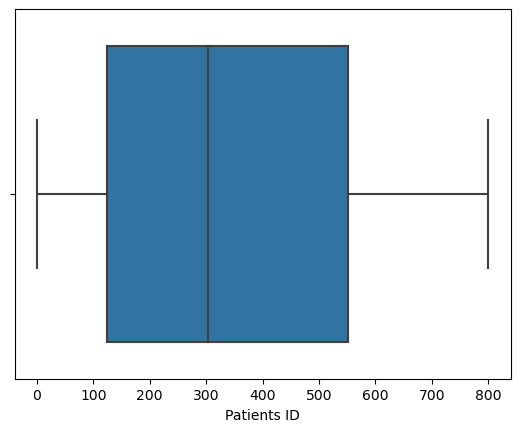

In [15]:
sns.boxplot(df['Patients ID'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HbA1c'>

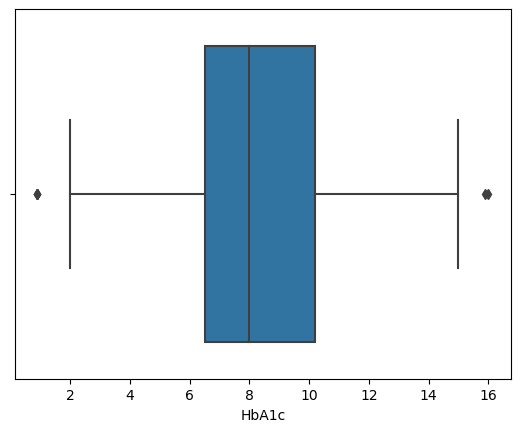

In [16]:
sns.boxplot(df['HbA1c'])

In [17]:
max_HbA1c = df['HbA1c'].quantile(0.995)
max_HbA1c

14.703499999999996

In [23]:
df[df['HbA1c']<max_HbA1c]

,Patients ID,Number of Patients,Sex,Patient Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,185,454316,M,64.0,8.8,106.0,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y
1002,188,454316,F,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
1003,189,454316,M,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
